In [19]:
import numpy as np
import theano 
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras import regularizers


In [4]:
#load data
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print('shape of xtrain'+str(x_train.shape))
print('shape of ytrain'+str(y_train.shape))
print('shape of xtest'+str(x_test.shape))
print('shape of ytest'+str(y_test.shape))

shape of xtrain(60000, 28, 28)
shape of ytrain(60000,)
shape of xtest(10000, 28, 28)
shape of ytest(10000,)


In [8]:
# reshaping 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
Xtrain = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
Xtest = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(Xtrain.shape)
print(Xtest.shape)

(60000, 784)
(10000, 784)


In [10]:
# one layer encoder decoder 
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [22]:
def fit_model(model,x_train,x_test,num):
    
    model.compile(optimizer='adadelta', loss='binary_crossentropy')
    model.fit(x_train, x_train,
                epochs=num,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [13]:
fit_model(autoencoder,Xtrain,Xtest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s - loss: 0.3715 - val_loss: 0.2725
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.2654 - val_loss: 0.2548
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.2448 - val_loss: 0.2325
Epoch 4/50
60000/60000 [==============================] - 5s - loss: 0.2245 - val_loss: 0.2141
Epoch 5/50
60000/60000 [==============================] - 5s - loss: 0.2086 - val_loss: 0.2007
Epoch 6/50
60000/60000 [==============================] - 5s - loss: 0.1973 - val_loss: 0.1912
Epoch 7/50
60000/60000 [==============================] - 5s - loss: 0.1889 - val_loss: 0.1838
Epoch 8/50
60000/60000 [==============================] - 5s - loss: 0.1821 - val_loss: 0.1777
Epoch 9/50
60000/60000 [==============================] - 5s - loss: 0.1764 - val_loss: 0.1723
Epoch 10/50
60000/60000 [==============================] - 5s - loss: 0.1714 - val_loss: 0.1678

In [14]:
Xpred=encoded.eval({input_img:Xtest})
print(Xpred.shape)

(10000, 32)


In [15]:
Xdecoded=decoded.eval({encoded:Xpred})
print(Xdecoded.shape)

(10000, 784)


In [17]:
def plot_output(x_test,decoded_imgs):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

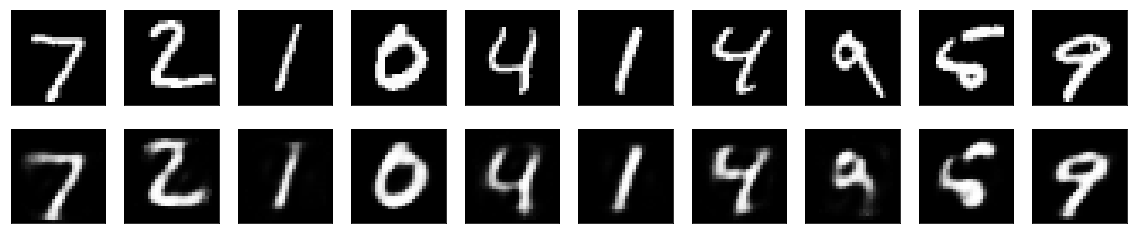

In [18]:
plot_output(Xtest,Xdecoded)

In [23]:
# multilayer and inclusion of regularization l1/l2
encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
fit_model(autoencoder,Xtrain,Xtest,100)
Xpred=encoded.eval({input_img:Xtest})
print(Xpred.shape)
Xdecoded=decoded.eval({encoded:Xpred})
print(Xdecoded.shape)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s - loss: 0.6839 - val_loss: 0.6606
Epoch 2/100
60000/60000 [==============================] - 5s - loss: 0.6439 - val_loss: 0.6272
Epoch 3/100
60000/60000 [==============================] - 5s - loss: 0.6111 - val_loss: 0.5952
Epoch 4/100
60000/60000 [==============================] - 5s - loss: 0.5801 - val_loss: 0.5655
Epoch 5/100
60000/60000 [==============================] - 5s - loss: 0.5518 - val_loss: 0.5386
Epoch 6/100
60000/60000 [==============================] - 5s - loss: 0.5263 - val_loss: 0.5145
Epoch 7/100
60000/60000 [==============================] - 5s - loss: 0.5036 - val_loss: 0.4932
Epoch 8/100
60000/60000 [==============================] - 5s - loss: 0.4835 - val_loss: 0.4743
Epoch 9/100
60000/60000 [==============================] - 5s - loss: 0.4658 - val_loss: 0.4577
Epoch 10/100
60000/60000 [==============================] - 5s - loss: 0.4501 - val_lo

60000/60000 [==============================] - 5s - loss: 0.2807 - val_loss: 0.2806
Epoch 86/100
60000/60000 [==============================] - 6s - loss: 0.2805 - val_loss: 0.2803
Epoch 87/100
60000/60000 [==============================] - 5s - loss: 0.2802 - val_loss: 0.2801
Epoch 88/100
60000/60000 [==============================] - 5s - loss: 0.2800 - val_loss: 0.2798
Epoch 89/100
60000/60000 [==============================] - 5s - loss: 0.2798 - val_loss: 0.2796
Epoch 90/100
60000/60000 [==============================] - 5s - loss: 0.2795 - val_loss: 0.2794
Epoch 91/100
60000/60000 [==============================] - 5s - loss: 0.2793 - val_loss: 0.2792
Epoch 92/100
60000/60000 [==============================] - 5s - loss: 0.2791 - val_loss: 0.2789
Epoch 93/100
60000/60000 [==============================] - 5s - loss: 0.2789 - val_loss: 0.2787
Epoch 94/100
60000/60000 [==============================] - 5s - loss: 0.2787 - val_loss: 0.2785
Epoch 95/100
60000/60000 [=================

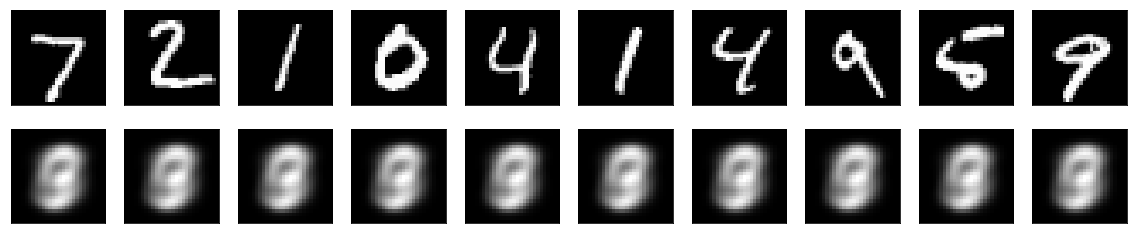

In [24]:
plot_output(Xtest,Xdecoded)

In [25]:
input_img = Input(shape=(784,))
encoded_1 = Dense(128, activation='relu')(input_img)
encoded_2 = Dense(64, activation='relu')(encoded_1)
encoded_3 = Dense(32, activation='relu')(encoded_2)

decoded_1 = Dense(64, activation='relu')(encoded_3)
decoded_2 = Dense(128, activation='relu')(decoded_1)
decoded_3 = Dense(784, activation='sigmoid')(decoded_2)
autoencoder = Model(input_img, decoded_3)
fit_model(autoencoder,Xtrain,Xtest,100)


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s - loss: 0.3315 - val_loss: 0.2632
Epoch 2/100
60000/60000 [==============================] - 6s - loss: 0.2579 - val_loss: 0.2510
Epoch 3/100
60000/60000 [==============================] - 5s - loss: 0.2429 - val_loss: 0.2335
Epoch 4/100
60000/60000 [==============================] - 7s - loss: 0.2242 - val_loss: 0.2141
Epoch 5/100
60000/60000 [==============================] - 6s - loss: 0.2076 - val_loss: 0.1990
Epoch 6/100
60000/60000 [==============================] - 6s - loss: 0.1966 - val_loss: 0.1919
Epoch 7/100
60000/60000 [==============================] - 6s - loss: 0.1887 - val_loss: 0.1826
Epoch 8/100
60000/60000 [==============================] - 6s - loss: 0.1810 - val_loss: 0.1785
Epoch 9/100
60000/60000 [==============================] - 6s - loss: 0.1753 - val_loss: 0.1702
Epoch 10/100
60000/60000 [==============================] - 6s - loss: 0.1705 - val_lo

60000/60000 [==============================] - 7s - loss: 0.1043 - val_loss: 0.1036
Epoch 86/100
60000/60000 [==============================] - 6s - loss: 0.1042 - val_loss: 0.1024
Epoch 87/100
60000/60000 [==============================] - 6s - loss: 0.1041 - val_loss: 0.1027
Epoch 88/100
60000/60000 [==============================] - 6s - loss: 0.1039 - val_loss: 0.1028
Epoch 89/100
60000/60000 [==============================] - 6s - loss: 0.1037 - val_loss: 0.1023
Epoch 90/100
60000/60000 [==============================] - 6s - loss: 0.1037 - val_loss: 0.1026
Epoch 91/100
60000/60000 [==============================] - 6s - loss: 0.1035 - val_loss: 0.1020
Epoch 92/100
60000/60000 [==============================] - 6s - loss: 0.1033 - val_loss: 0.1026
Epoch 93/100
60000/60000 [==============================] - 6s - loss: 0.1031 - val_loss: 0.1015
Epoch 94/100
60000/60000 [==============================] - 6s - loss: 0.1031 - val_loss: 0.1022
Epoch 95/100
60000/60000 [=================

UnusedInputError: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 0 is not part of the computational graph needed to compute the outputs: /input_5.
To make this error into a warning, you can pass the parameter on_unused_input='warn' to theano.function. To disable it completely, use on_unused_input='ignore'.

In [26]:
Xpred=encoded_3.eval({input_img:Xtest})
print(Xpred.shape)
Xdecoded=decoded_3.eval({encoded_3:Xpred})
print(Xdecoded.shape)

(10000, 32)
(10000, 784)


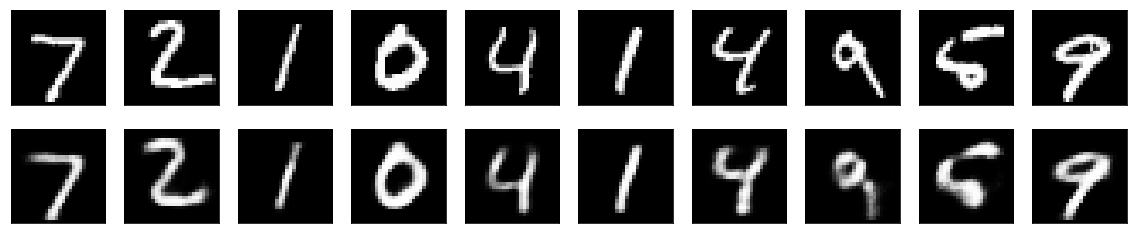

In [27]:
plot_output(Xtest,Xdecoded)